**Оценка качества аглоритмов обучения с учителем**


In [108]:
import numpy as np
np.random.seed(42)
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

***Метрики качества регрессии***

In [109]:
# Генерируем 100 случайных значений в диапазоне 0 - 1 для "реальных" значений
y_test_reg = np.random.rand(100)

# Генерируем 100 случайных значений в диапазоне 0 - 1 для "предсказанных" 
# значений
y_pred_reg = np.random.rand(100)

MSE - среднеквадратичная ошибка

In [110]:
mse = metrics.mean_squared_error(y_test_reg, y_pred_reg)
mse

0.17931033775488264

MAE - средняя абсолютная ошибка

In [111]:
mae = metrics.mean_absolute_error(y_test_reg, y_pred_reg)
mae

0.3541220765893819

Huber loss - функция потерь Хьюбера

In [112]:
# Создаем синтетические данные для регрессии
X, y = make_regression(n_samples=100, n_features=10, noise=0.5)

# Разбиваем данные на обучающиую и тестовую выборки
X_train, X_test, y_train, y_test_reg = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

# Обучаем модель регрессии с фнкцией потерь Хьюбера на обучающей выборке
# epsilon=1.35 - параметр, определяющий порог перехода от квадратичной 
# к линейной функции потерь
model = HuberRegressor(epsilon=1.35)
model.fit(X_train, y_train)

# Делаем прогнозы на тестовой выборке
y_pred_reg = model.predict(X_test)

# Оцениваем качество прогнозов с помощью среднеквадратической ошибки
mse = metrics.mean_squared_error(y_test_reg, y_pred_reg)
mse

0.34002295858409565

***Метрики классификации***

Accuracy - точность, доля правильных ответов модели относительно всех ответов 

In [113]:
# Создаем 20 значений 0 и 1 для "реальных" значений
y_test_cl = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Cоздаем 20 значений 0 и 1 для "предсказанных" значений
y_pred_cl = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]

# Оцениваем качество прогнозов с помощью метрики aссuracy
accuracy = metrics.accuracy_score(y_test_cl, y_pred_cl)
accuracy

0.75

Presition - точность положительного класса, доля правильно клссифицированных объектов положительного класса, которые модель классифицировала как положительный класс

In [114]:
# Создаем 20 значений 0 и 1 для "реальных" значений
y_test_cl = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Cоздаем 20 значений 0 и 1 для "предсказанных" значений
y_pred_cl = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]

# Оцениваем качество прогнозов с помощью метрики presition
presition = metrics.precision_score(y_test_cl, y_pred_cl)
presition

0.6923076923076923

Recall - полнота, доля правильно классифицированных объектов положительного класса относительно всех объектов, которые на самом деле относятся к положительному классу

In [115]:
# Создаем 20 значений 0 и 1 для "реальных" значений
y_test_cl = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Cоздаем 20 значений 0 и 1 для "предсказанных" значений
y_pred_cl = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]

# Оцениваем качество прогнозов с помощью метрики presition
recall = metrics.recall_score(y_test_cl, y_pred_cl)
recall

0.9

F1 - мера, это гарманическое среднее между точностью положительного класса и полнотой

In [116]:
# Создаем 20 значений 0 и 1 для "реальных" значений
y_test_cl = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Cоздаем 20 значений 0 и 1 для "предсказанных" значений
y_pred_cl = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]

# Оцениваем качество прогнозов с помощью метрики presition
f1_score = metrics.f1_score(y_test_cl, y_pred_cl)
f1_score

0.782608695652174

*Метрики качества многоклассовой классификации*

In [117]:
# Считаем ответы, двигаясь по сетке слева-направо сверху-вниз
# Создаем 30 "реальных" значений (3 класса)
y_test_cl = [1]*6 + [3] + [1] + [3]*2 + [1]*2 + [2] + [1] + [3]*2 + [2] + \
            [3] + [2]*5 + [3] + [2]*2 + [3]*3 + [2]

# Cоздаем 30 "предсказанных" значений (3 класса)
y_pred_cl = [1]*4 + [3] + [1]*3 + [3]*2 + [1]*4 + [3]*4 + [2]*4 + [3]*2 + \
            [2]*3 + [3] + [2]*2

Micro resition

In [118]:
micro_presition = metrics.precision_score(y_test_cl, y_pred_cl, 
                                          average='micro')
micro_presition

0.7666666666666667

Macro Presition

In [119]:
macro_presition = metrics.precision_score(y_test_cl, y_pred_cl, 
                                          average='macro')
macro_presition

0.7653198653198654

Weighted Presition 

In [120]:
weighted_presition = metrics.precision_score(y_test_cl, y_pred_cl, 
                                             average='weighted')
weighted_presition

0.7653198653198653

Micro Recall

In [121]:
micro_recall = metrics.recall_score(y_test_cl, y_pred_cl, 
                                    average='micro')
micro_recall

0.7666666666666667

Macro Recall

In [122]:
macro_recall = metrics.recall_score(y_test_cl, y_pred_cl, 
                                    average='macro')
macro_recall

0.7666666666666666

Weighted Recall

In [123]:
weighted_recall = metrics.recall_score(y_test_cl, y_pred_cl, 
                                       average='weighted')
weighted_recall

0.7666666666666667

Micro F1-мера

In [124]:
micro_f1_score = metrics.f1_score(y_test_cl, y_pred_cl,
                                  average='micro')
micro_f1_score

0.7666666666666667

Macro F1-мера

In [125]:
macro_f1_score = metrics.f1_score(y_test_cl, y_pred_cl,
                                  average='macro')
macro_f1_score

0.7646616541353383

Weighted F1-мера

In [126]:
weghted_f1_score = metrics.f1_score(y_test_cl, y_pred_cl,
                                    average='weighted')
weghted_f1_score

0.7646616541353384

Report (отчет)

In [127]:
target_names = ['Класс 1', 'Класс 2', 'Класс 3']
report = metrics.classification_report(y_test_cl, y_pred_cl, target_names=target_names)
print(report)

              precision    recall  f1-score   support

     Класс 1       0.82      0.90      0.86        10
     Класс 2       0.78      0.70      0.74        10
     Класс 3       0.70      0.70      0.70        10

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.76        30
weighted avg       0.77      0.77      0.76        30



Confusion Matrix

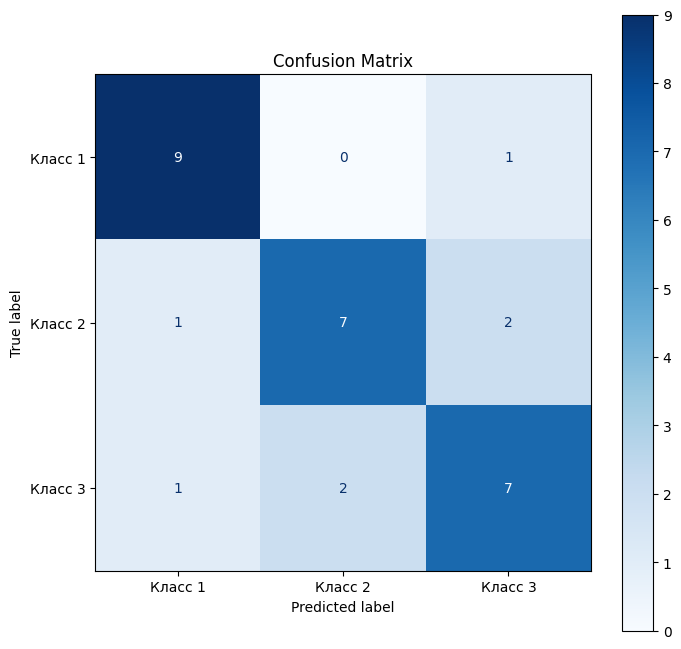

In [128]:
np.set_printoptions(precision=2)

# Создаем  матрицу ошибок
cm = metrics.confusion_matrix(y_test_cl, y_pred_cl)

class_names = ['Класс 1', 'Класс 2', 'Класс 3']

# Создаем объект класса ConfusionMatrixDisplay
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                     display_labels=class_names)

# Строим график Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 8))
cmd.plot(ax=ax, cmap='Blues')

# Добавляем название и подписи к графику
ax.set_title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()